In [6]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


In [2]:
df = pd.read_csv(r"D:\py_machine_learning\datasets\ecommerce_customer_churn_dataset - ecommerce_customer_churn_dataset.csv")

df.head(5)

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29,51.4,NaN,19.1,9.0,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


In [3]:
df.isnull().sum()

Age                              2495
Gender                              0
Country                             0
City                                0
Membership_Years                    0
Login_Frequency                     0
Session_Duration_Avg             3399
Pages_Per_Session                3000
Cart_Abandonment_Rate               0
Wishlist_Items                   4000
Total_Purchases                     0
Average_Order_Value                 0
Days_Since_Last_Purchase         3000
Discount_Usage_Rate              3500
Returns_Rate                     4491
Email_Open_Rate                  2528
Customer_Service_Calls            168
Product_Reviews_Written          3500
Social_Media_Engagement_Score    6000
Mobile_App_Usage                 5000
Payment_Method_Diversity         2500
Lifetime_Value                      0
Credit_Balance                   5500
Churned                             0
Signup_Quarter                      0
dtype: int64

In [4]:
x = df.drop(columns=['Signup_Quarter'])
y = df['Signup_Quarter']

In [7]:
lb = LabelEncoder()

In [8]:
x['Gender'] = lb.fit_transform(x['Gender'])
x['Country'] = lb.fit_transform(x['Country'])
x['City'] = lb.fit_transform(x['City'])

In [10]:
ohe = OneHotEncoder(drop = 'first',sparse_output=False, dtype=np.int32)

In [11]:
ohe.fit_transform(df[['Country','City']])

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(50000, 46), dtype=int32)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [14]:
np.round(x_train.describe(),2)

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned
count,38016.00,40000.00,40000.00,40000.00,40000.00,40000.00,37286.00,37603.00,40000.00,36784.00,...,36414.00,38010.00,39863.00,37199.00,35174.00,35995.00,37990.00,40000.00,35605.00,40000.00
mean,37.82,0.52,4.45,19.03,2.99,11.63,27.66,8.73,57.08,4.30,...,6.70,20.91,5.68,2.85,29.38,19.37,2.35,1439.56,1966.37,0.29
std,11.93,0.54,2.53,10.87,2.06,7.82,10.87,3.78,16.33,3.19,...,6.12,14.24,2.68,2.32,20.57,9.41,1.11,904.73,1224.53,0.45
min,5.00,0.00,0.00,0.00,0.10,0.00,1.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
25%,29.00,0.00,2.00,10.00,1.40,6.00,19.70,6.00,46.40,2.00,...,2.90,9.90,4.00,1.00,13.20,12.60,2.00,791.68,1048.00,0.00
50%,38.00,0.00,5.00,18.00,2.50,11.00,26.70,8.40,58.10,4.00,...,5.40,19.70,5.00,2.00,27.70,18.60,2.00,1243.09,1899.00,0.00
75%,46.00,1.00,7.00,28.00,4.10,17.00,34.70,11.20,68.70,6.00,...,9.10,30.30,7.00,4.00,43.10,25.40,3.00,1872.52,2791.00,1.00
max,200.00,2.00,7.00,39.00,10.00,46.00,75.60,24.10,142.85,28.00,...,99.62,91.70,21.00,21.00,100.00,61.90,5.00,8023.20,6987.00,1.00


In [15]:
sc = StandardScaler()

In [17]:
x_train_sc = sc.fit_transform(x_train)

In [18]:
x_train_new = pd.DataFrame(x_train_sc, columns=x_train.columns)

In [19]:
np.round(x_train_new.describe(),2)

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned
count,38016.00,40000.00,40000.00,40000.00,40000.00,40000.00,37286.00,37603.00,40000.00,36784.00,...,36414.00,38010.00,39863.00,37199.00,35174.00,35995.00,37990.00,40000.00,35605.00,40000.00
mean,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,...,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.75,-0.97,-1.76,-1.75,-1.40,-1.49,-2.45,-2.05,-3.50,-1.35,...,-1.09,-1.47,-2.12,-1.22,-1.43,-2.06,-1.22,-1.59,-1.61,-0.64
25%,-0.74,-0.97,-0.97,-0.83,-0.77,-0.72,-0.73,-0.72,-0.65,-0.72,...,-0.62,-0.77,-0.63,-0.79,-0.79,-0.72,-0.32,-0.72,-0.75,-0.64
50%,0.01,-0.97,0.22,-0.09,-0.24,-0.08,-0.09,-0.09,0.06,-0.09,...,-0.21,-0.09,-0.25,-0.36,-0.08,-0.08,-0.32,-0.22,-0.06,-0.64
75%,0.69,0.90,1.01,0.82,0.54,0.69,0.65,0.65,0.71,0.53,...,0.39,0.66,0.49,0.50,0.67,0.64,0.58,0.48,0.67,1.57
max,13.60,2.77,1.01,1.84,3.40,4.40,4.41,4.07,5.25,7.43,...,15.18,4.97,5.72,7.81,3.43,4.52,2.38,7.28,4.10,1.57


In [20]:
mn = MinMaxScaler()

In [21]:
x_train_mn = mn.fit_transform(x_train)

In [22]:
x_train_new = pd.DataFrame(x_train_mn, columns=x_train.columns)

In [23]:
np.round(x_train_new.describe(),2)

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned
count,38016.00,40000.00,40000.00,40000.00,40000.00,40000.00,37286.00,37603.00,40000.00,36784.00,...,36414.00,38010.00,39863.00,37199.00,35174.00,35995.00,37990.00,40000.00,35605.00,40000.00
mean,0.17,0.26,0.64,0.49,0.29,0.25,0.36,0.33,0.40,0.15,...,0.07,0.23,0.27,0.14,0.29,0.31,0.34,0.18,0.28,0.29
std,0.06,0.27,0.36,0.28,0.21,0.17,0.15,0.16,0.11,0.11,...,0.06,0.16,0.13,0.11,0.21,0.15,0.28,0.11,0.18,0.45
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.12,0.00,0.29,0.26,0.13,0.13,0.25,0.22,0.32,0.07,...,0.03,0.11,0.19,0.05,0.13,0.20,0.25,0.10,0.15,0.00
50%,0.17,0.00,0.71,0.46,0.24,0.24,0.34,0.32,0.41,0.14,...,0.05,0.21,0.24,0.10,0.28,0.30,0.25,0.15,0.27,0.00
75%,0.21,0.50,1.00,0.72,0.40,0.37,0.45,0.44,0.48,0.21,...,0.09,0.33,0.33,0.19,0.43,0.41,0.50,0.23,0.40,1.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(
    columns= ['Signup_Quarter']), df['Signup_Quarter'],test_size=0.2)

In [26]:
si = SimpleImputer(strategy="mean")
x_train_fever = si.fit_transform(x_train[['Age','Session_Duration_Avg','Pages_Per_Session','Wishlist_Items','Days_Since_Last_Purchase','Discount_Usage_Rate','Returns_Rate','Email_Open_Rate','Customer_Service_Calls','Product_Reviews_Written','Social_Media_Engagement_Score','Mobile_App_Usage','Payment_Method_Diversity','Credit_Balance']])

# also the test data
x_test_fever = si.fit_transform(x_test[['Age','Session_Duration_Avg','Pages_Per_Session','Wishlist_Items','Days_Since_Last_Purchase','Discount_Usage_Rate','Returns_Rate','Email_Open_Rate','Customer_Service_Calls','Product_Reviews_Written','Social_Media_Engagement_Score','Mobile_App_Usage','Payment_Method_Diversity','Credit_Balance']])
x_train_fever.shape

(40000, 14)

In [27]:
from sklearn.preprocessing import OrdinalEncoder

In [34]:
oe = OrdinalEncoder(categories=[['Male', 'Female','Other']])
x_train_gender = oe.fit_transform(x_train[['Gender']])

# also the test data
x_test_gender = oe.fit_transform(x_test[['Gender']])

x_train_gender.shape

(40000, 1)

In [35]:
ohe = OneHotEncoder(drop = 'first', sparse_output = False)
x_train_city = ohe.fit_transform(x_train[['Country', 'City']])

# also the test data

x_test_city = ohe.fit_transform(x_test[['Country', 'City']])
x_train_city.shape

(40000, 46)

In [36]:
x_train_country = x_train.drop(columns=['Country', 'City','Gender']).values

# also the test data

x_test_age = x_test.drop(columns=['Country', 'City','Gender']).values

In [37]:
x_train_transformed = np.concatenate((x_train_gender, x_train_country,
                                      x_train_city,
                                      ),axis = 1)

In [38]:


transformer = ColumnTransformer(transformers=[
    ('tnf1',SimpleImputer(),['Age','Session_Duration_Avg','Pages_Per_Session','Wishlist_Items','Days_Since_Last_Purchase','Discount_Usage_Rate','Returns_Rate','Email_Open_Rate','Customer_Service_Calls','Product_Reviews_Written','Social_Media_Engagement_Score','Mobile_App_Usage','Payment_Method_Diversity','Credit_Balance']), 
    ('tnf2',OrdinalEncoder(categories=[['Male', 'Female','Other']]),['Gender']), 
    ('tnf3',OneHotEncoder(sparse_output=False,drop = 'first'),['Country', 'City'])

],remainder='passthrough') 

In [39]:
transformer.fit_transform(x_train).shape


(40000, 68)

In [40]:
transformer.fit_transform(x_test).shape

(10000, 68)

In [42]:
import seaborn as sns

<Axes: xlabel='Age'>

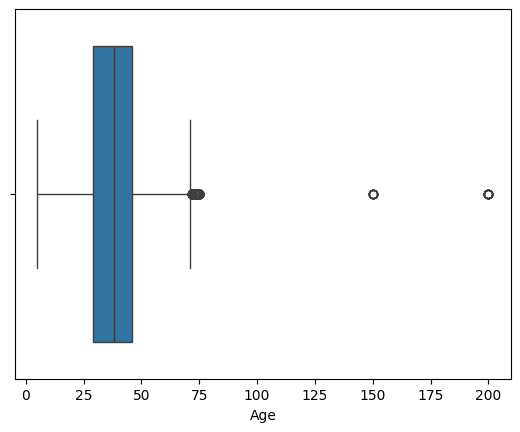

In [43]:
sns.boxplot(x= df['Age'])

In [44]:


percentile25 = df['Age'].quantile(0.25) 
percentile75 = df['Age'].quantile(0.75)

In [45]:
IQR = percentile75 - percentile25
IQR

np.float64(17.0)

In [46]:
upper_limit = percentile75 + 1.5*IQR 
upper_limit

np.float64(71.5)

In [47]:
lower_limit = percentile25 - 1.5*IQR
lower_limit

np.float64(3.5)

In [48]:
df[df['Age']>upper_limit]

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
209,75.0,Male,USA,Phoenix,1.0,6,28.3,4.9,60.4,2.0,...,33.5,4.0,1.0,5.9,16.0,4.0,595.05,3097.0,0,Q1
478,74.0,Male,India,Delhi,3.6,24,37.9,9.4,37.8,10.0,...,40.9,3.0,3.0,46.6,23.8,3.0,1403.40,2295.0,0,Q4
1615,75.0,Female,Australia,Sydney,2.7,13,24.4,12.8,48.5,4.0,...,25.0,6.0,1.0,47.1,22.9,2.0,1946.89,4669.0,1,Q3
2305,75.0,Female,France,Paris,4.0,27,49.1,15.6,22.2,7.0,...,29.0,4.0,8.0,64.2,34.6,1.0,1528.38,NaN,0,Q4
2506,73.0,Male,USA,Houston,0.7,5,27.8,3.9,71.8,1.0,...,1.4,5.0,3.0,5.5,20.8,2.0,1519.95,NaN,0,Q1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48594,72.0,Male,Germany,Munich,0.8,4,19.6,6.7,71.1,2.0,...,0.9,6.0,1.0,17.2,15.7,NaN,674.14,2373.0,0,Q3
49331,200.0,Male,France,Lyon,0.7,11,16.0,9.7,56.3,1.0,...,4.0,10.0,3.0,12.8,8.5,3.0,1002.36,3486.0,0,Q1
49428,73.0,Male,UK,Birmingham,2.8,11,31.8,9.2,50.4,1.0,...,31.1,5.0,4.0,36.0,15.7,NaN,1170.66,1129.0,0,Q3
49458,72.0,Male,Australia,Melbourne,3.6,7,33.7,9.2,61.6,7.0,...,27.0,5.0,2.0,31.1,NaN,1.0,2072.39,1399.0,0,Q2


In [49]:
df[df['Age']<lower_limit]

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter


In [50]:
newdf = df[df['Age']< upper_limit]

In [52]:
import matplotlib.pyplot as plt

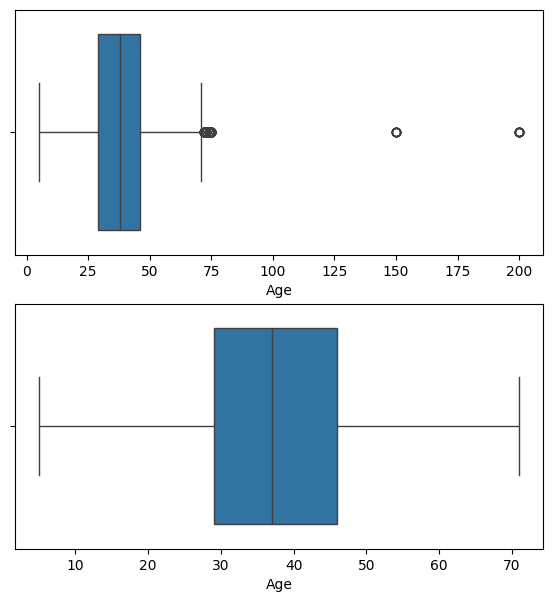

In [53]:
plt.figure(figsize=(15,7))

plt.subplot(222)
sns.boxplot(x=df['Age'])

plt.subplot(224)
sns.boxplot(x=newdf['Age'])
plt.show()

In [54]:
new_df_cap = df.copy()

In [55]:
new_df_cap['Age'] = np.where(

    new_df_cap['Age'] > upper_limit,
    upper_limit,

    np.where(
        new_df_cap['Age'] < lower_limit,
        lower_limit,
        new_df_cap['Age']
    )
)


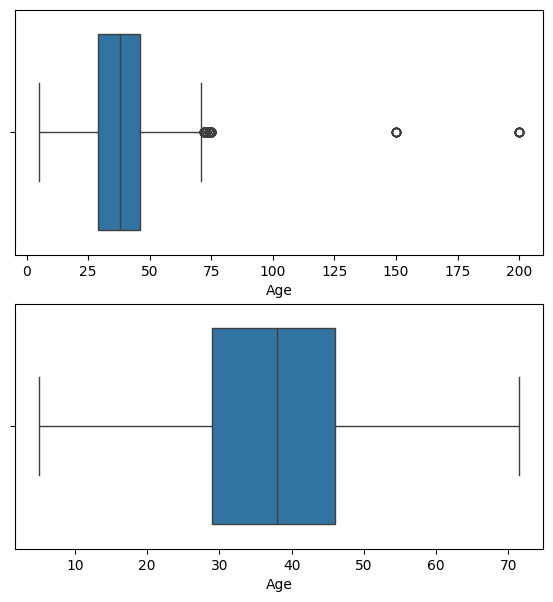

In [56]:
plt.figure(figsize=(15,7))

plt.subplot(222)
sns.boxplot(x=df['Age'])

plt.subplot(224)
sns.boxplot(x=new_df_cap['Age'])
plt.show()